In [54]:
#Importing all the useful libraries
import pandas as pd
import glob
from matplotlib import pyplot as plt

In the next section, we are going to look into and clean up the solar irradiance data. We collect data from 10 different towns/ city centres across the UK then we average them. We assume that the average is what the solar irradiance for the UK would be

In [55]:
#We look into one of the cities - London
df_London = pd.read_csv("Irradiance_Data/London.csv", index_col=None, header = 0, skiprows=9, parse_dates= {"date" : ["YEAR","MO","DY"]})
df_London.head(20)

,date,HR,ALLSKY_SFC_SW_DWN
0,2011-01-01,0,0.00
1,2011-01-01,1,0.00
2,2011-01-01,2,0.00
3,2011-01-01,3,0.00
4,2011-01-01,4,0.00
5,2011-01-01,5,0.00
6,2011-01-01,6,0.00
7,2011-01-01,7,0.00
8,2011-01-01,8,17.03
9,2011-01-01,9,95.88


In [56]:
#Let's try plot data for the first day solar irradiance in London then
day_one_London = df_London.iloc[0:24] #This will return a dataframe of the first 24 elements exracted from the original dataframe

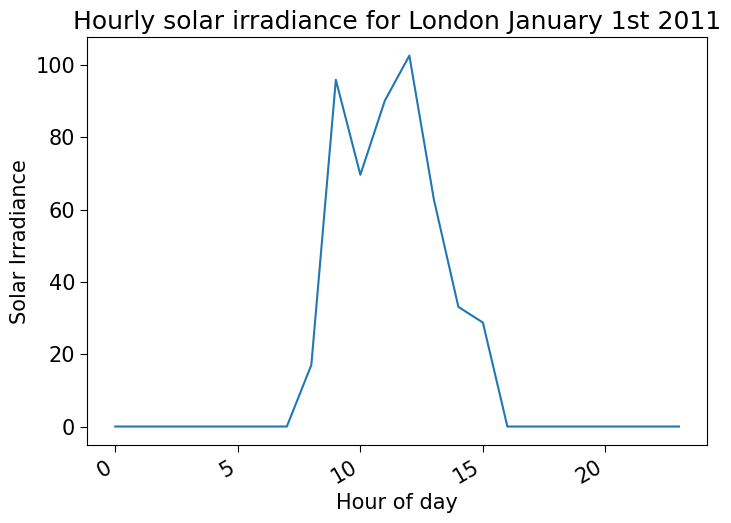

In [57]:
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6]) 
ax.plot(day_one_London["HR"], day_one_London["ALLSKY_SFC_SW_DWN"])
ax.set_xlabel("Hour of day")
ax.set_ylabel("Solar Irradiance")
ax.set_title("Hourly solar irradiance for London January 1st 2011")
fig.autofmt_xdate()


In [58]:
#Now we are looking into the second town - Glasgow.
df_Glasgow = pd.read_csv("Irradiance_Data/Glasgow.csv", index_col=None, header = 0, skiprows=9, parse_dates= {"date" : ["YEAR","MO","DY"]})

In [59]:
#Let's try plot data for the first day solar irradiance in Glasgow then
day_one_Glasgow = df_Glasgow.iloc[0:24]

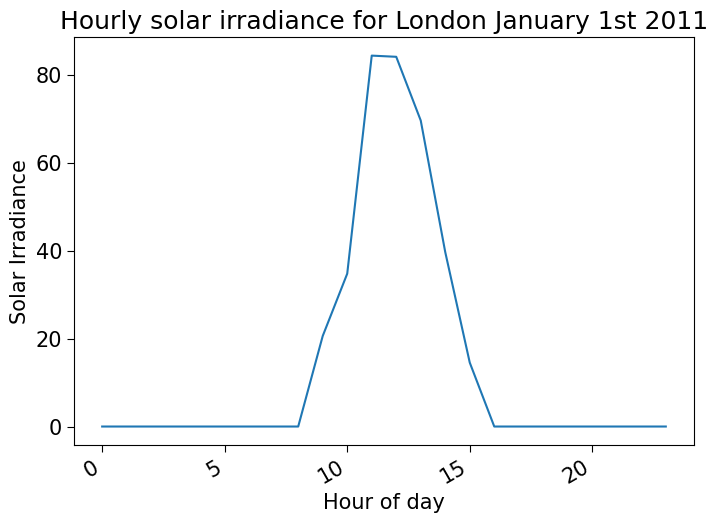

In [60]:
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6]) 
ax.plot(day_one_Glasgow["HR"], day_one_Glasgow["ALLSKY_SFC_SW_DWN"])
ax.set_xlabel("Hour of day")
ax.set_ylabel("Solar Irradiance")
ax.set_title("Hourly solar irradiance for London January 1st 2011")
fig.autofmt_xdate()


When plotted, we observe the expected disparity. Glasgow irradiance is generally slightly lower than that of London. We expected for London to have more sunshine which is actually the case. Glasgow's maximum irradiance is 80 while London's is 100. Also, note that while Glasgow has only one peak, London has two peaks in sunshine occuring almost consecutively. This does not reveal much except for the fact that the two regions have different (yet similar in terms of start and end time of irradiance) solar patterns

In [61]:
#Now loading all of them
path = "Irradiance_Data"
all_csv_files = glob.glob(path + "/*.csv")
li = []
for filename in all_csv_files:
    #df = pd.read_csv(filename, index_col=None, header = 0, skiprows=9)
    df = pd.read_csv(filename, index_col=None, header = 0, skiprows=9, parse_dates= {"date" : ["YEAR","MO","DY"]})
    li.append(df)

In [62]:
#Note that all the data has been loaded onto the list called li in this case. Just a quick reminder on how to access this data

print(len(li)) # This returns 10 which means we have 10 elements in there
print(li[3]) # Returns values from the fourth file. Possibly Edinburgh. How to access and append
print(li[3]["ALLSKY_SFC_SW_DWN"]) #This returns the data for irradiance in the fourth file within the li dataset

10
            date  HR  ALLSKY_SFC_SW_DWN
0     2011-01-01   0                0.0
1     2011-01-01   1                0.0
2     2011-01-01   2                0.0
3     2011-01-01   3                0.0
4     2011-01-01   4                0.0
...          ...  ..                ...
87691 2021-01-01  19                0.0
87692 2021-01-01  20                0.0
87693 2021-01-01  21                0.0
87694 2021-01-01  22                0.0
87695 2021-01-01  23                0.0

[87696 rows x 3 columns]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87691    0.0
87692    0.0
87693    0.0
87694    0.0
87695    0.0
Name: ALLSKY_SFC_SW_DWN, Length: 87696, dtype: float64


In [63]:
df_total = pd.DataFrame(li[0])
print(li[1].head(30)) # 0 is belfast, 1 is Birmingham

         date  HR  ALLSKY_SFC_SW_DWN
0  2011-01-01   0               0.00
1  2011-01-01   1               0.00
2  2011-01-01   2               0.00
3  2011-01-01   3               0.00
4  2011-01-01   4               0.00
5  2011-01-01   5               0.00
6  2011-01-01   6               0.00
7  2011-01-01   7               0.00
8  2011-01-01   8              12.30
9  2011-01-01   9              82.76
10 2011-01-01  10              86.09
11 2011-01-01  11              52.48
12 2011-01-01  12              58.85
13 2011-01-01  13              68.45
14 2011-01-01  14              33.93
15 2011-01-01  15              21.33
16 2011-01-01  16               0.00
17 2011-01-01  17               0.00
18 2011-01-01  18               0.00
19 2011-01-01  19               0.00
20 2011-01-01  20               0.00
21 2011-01-01  21               0.00
22 2011-01-01  22               0.00
23 2011-01-01  23               0.00
24 2011-01-02   0               0.00
25 2011-01-02   1               0.00
2

In [64]:
#Creating our new datafram
df_total["Birmingham"] = li[1]["ALLSKY_SFC_SW_DWN"]
df_total["Cardiff"] = li[2]["ALLSKY_SFC_SW_DWN"]
df_total["Edinburgh"] = li[3]["ALLSKY_SFC_SW_DWN"]
df_total["Glasgow"] = li[4]["ALLSKY_SFC_SW_DWN"]
df_total["Inverness"] = li[5]["ALLSKY_SFC_SW_DWN"]
df_total["Liverpool"] = li[6]["ALLSKY_SFC_SW_DWN"]
df_total["London"] = li[7]["ALLSKY_SFC_SW_DWN"]
df_total["Londonderry"] = li[8]["ALLSKY_SFC_SW_DWN"]
df_total["Omagh"] = li[9]["ALLSKY_SFC_SW_DWN"]
df_total['Average_Irradiance'] = df_total.iloc[:,2:11].mean(axis=1)
df_total.head(40)

,date,HR,ALLSKY_SFC_SW_DWN,Birmingham,Cardiff,Edinburgh,Glasgow,Inverness,Liverpool,London,Londonderry,Omagh,Average_Irradiance
0,2011-01-01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,2011-01-01,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
2,2011-01-01,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
3,2011-01-01,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
4,2011-01-01,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
5,2011-01-01,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
6,2011-01-01,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
7,2011-01-01,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
8,2011-01-01,8,0.00,12.30,10.25,0.00,0.00,0.00,0.00,17.03,0.00,0.00,4.397778
9,2011-01-01,9,29.02,82.76,87.88,39.65,20.61,15.13,39.65,95.88,21.58,33.59,48.017778


In [65]:
day_one_UK = df_total.iloc[0:24]
day_one_UK #returns the first 24 datapoints to indicate the first 24 hours hence the first day of January 2011

,date,HR,ALLSKY_SFC_SW_DWN,Birmingham,Cardiff,Edinburgh,Glasgow,Inverness,Liverpool,London,Londonderry,Omagh,Average_Irradiance
0,2011-01-01,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,2011-01-01,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
2,2011-01-01,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
3,2011-01-01,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
4,2011-01-01,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
5,2011-01-01,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
6,2011-01-01,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
7,2011-01-01,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
8,2011-01-01,8,0.00,12.30,10.25,0.00,0.00,0.00,0.00,17.03,0.00,0.00,4.397778
9,2011-01-01,9,29.02,82.76,87.88,39.65,20.61,15.13,39.65,95.88,21.58,33.59,48.017778


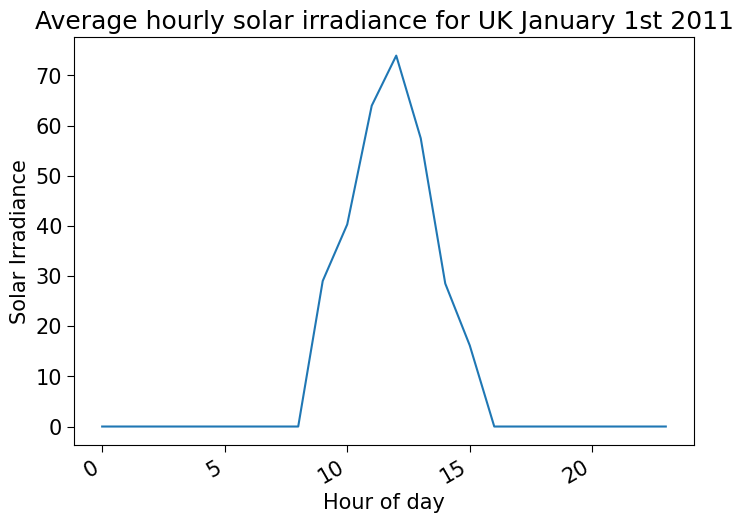

In [66]:
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6]) 
ax.plot(day_one_UK["HR"], day_one_UK["ALLSKY_SFC_SW_DWN"])
ax.set_xlabel("Hour of day")
ax.set_ylabel("Solar Irradiance")
ax.set_title("Average hourly solar irradiance for UK January 1st 2011")
fig.autofmt_xdate()

In [67]:
df_2011_demand = pd.read_csv("Demand_Data/demanddata_2011.csv", index_col=None, header = 0)
df_2011_demand.head(50)
#print(len(df_2011_demand))

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW
0,01-JAN-2011,1,34606,35648,31058,484,1730,0,79,0,60,1939,0,0,-382,0,0
1,01-JAN-2011,2,35092,36089,31460,520,1730,0,79,0,16,1939,0,0,-381,0,0
2,01-JAN-2011,3,34725,36256,31109,520,1730,0,79,0,549,1989,0,0,-382,0,0
3,01-JAN-2011,4,33649,35628,30174,512,1730,0,79,0,998,1991,0,0,-381,0,0
4,01-JAN-2011,5,32644,34752,29253,512,1730,0,79,0,1126,1992,0,0,-382,0,0
5,01-JAN-2011,6,32092,34134,28688,464,1730,0,79,0,1061,1992,0,0,-381,0,0
6,01-JAN-2011,7,31101,33174,27714,464,1730,0,79,0,1092,1992,0,0,-381,0,0
7,01-JAN-2011,8,29874,32471,26575,473,1730,0,79,0,1616,1993,0,0,-381,0,0
8,01-JAN-2011,9,28795,31415,25623,473,1730,0,79,0,1639,1992,0,0,-381,0,0
9,01-JAN-2011,10,28097,30696,25034,511,1730,0,79,0,1618,1992,0,0,-381,0,0


In [68]:
day_one_UK_demand = df_2011_demand.iloc[0:48]
print(len(day_one_UK_demand)) # returns 48 elements
#day_one_UK_demand.head(10)

48


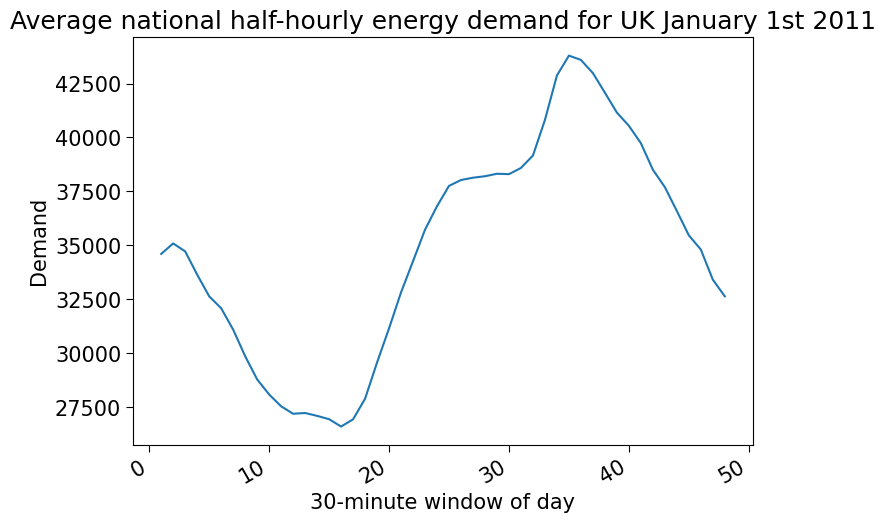

In [69]:
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6]) 
ax.plot(day_one_UK_demand["SETTLEMENT_PERIOD"], day_one_UK_demand["ND"])
ax.set_xlabel("30-minute window of day")
ax.set_ylabel("Demand")
ax.set_title("Average national half-hourly energy demand for UK January 1st 2011")
fig.autofmt_xdate()

24


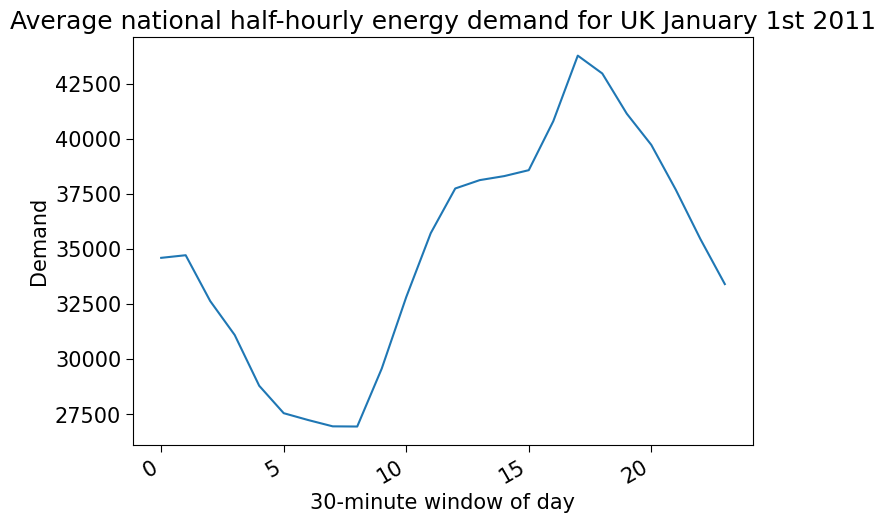

In [70]:
#Applying filter to pick only the even rows so that we have one hour time spans for comparison purposes
df_2011_hourly_demand = df_2011_demand[df_2011_demand.index%2 == 0]
df_2011_hourly_demand = df_2011_hourly_demand.reset_index(drop=True)
df_2011_hourly_demand["SETTLEMENT_PERIOD"] = day_one_UK["HR"]
df_2011_hourly_demand.head(20)
day_one_UK_hourly_demand = df_2011_hourly_demand.iloc[0:24]
print(len(day_one_UK_hourly_demand))
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)
fig, ax = plt.subplots(figsize = [8,6]) 
ax.plot(day_one_UK_hourly_demand["SETTLEMENT_PERIOD"], day_one_UK_hourly_demand["ND"])
ax.set_xlabel("30-minute window of day")
ax.set_ylabel("Demand")
ax.set_title("Average national half-hourly energy demand for UK January 1st 2011")
fig.autofmt_xdate()

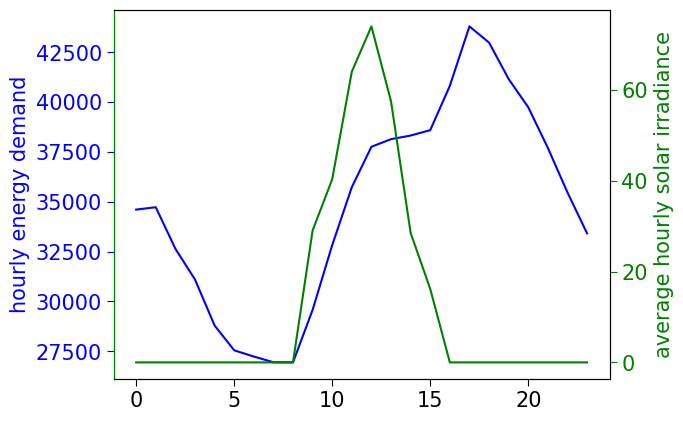

In [71]:
#Now trying to plot them side by side to see if there is going to be any noticeable pattern
#Note: there is a module called plotly that has a bit more interactive plotting capabilities
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(day_one_UK_hourly_demand["SETTLEMENT_PERIOD"], day_one_UK_hourly_demand["ND"], color = "blue")
ax1 = ax.twinx()
ax1.plot(day_one_UK["HR"], day_one_UK["ALLSKY_SFC_SW_DWN"], color = "green")

#Setting the labels for y axis
ax.set_ylabel("hourly energy demand", color = "blue")
ax1.set_ylabel("average hourly solar irradiance", color = "green")

#Setting the spine colors
ax.spines["right"].set_color("blue")
ax1.spines["left"].set_color("green")

#Changing the ticks on the y axis to correspond to the colors
ax.tick_params(axis = "y", colors = "blue")
ax1.tick_params(axis = "y", colors = "green")
plt.show()



From this point onwards, we will be trying to implement the Recurrent Neural Network to see how we can predict

In [72]:
#We begin by importing the libraries
import seaborn as sns
from pylab import rcParams
from matplotlib import pyplot as plt
from matplotlib import rc
import math
import matplotlib
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import pytorch_lightning as plt
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict